### Pendulum simulation - wihtout damping
The motion of a pendulum is governed by the equation: 
$$ \dot{\theta} = -\frac{g}{l}sin(\theta)$$

To explore the motion of a pendulum from differential equation form, the *state space model* must first be derived. To derive *state space model*, start by setting the following variables:
$$x_1 = \theta$$
$$x_2 = \dot{\theta}$$

then the *state space mdoel* will take the following form: 
$$\frac{d}{dt} (\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_2 \\ -\frac{g}{l}sin(x_1) \end{bmatrix} $$

With parameters, g: gravity = 9.8  and l: length of pendulum = 1, the followin code block is yielded. 

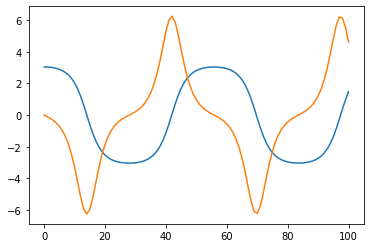

In [5]:
from scipy import signal
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

g = 9.8
l = 1 

# define state space model
import numpy as np
import matplotlib.pylab as plt

def ode45_step(f, x, t, dt, *args):
    """
    One step of 4th Order Runge-Kutta method
    """
    k = dt
    k1 = k * f(t, x, *args)
    k2 = k * f(t + 0.5*k, x + 0.5*k1, *args)
    k3 = k * f(t + 0.5*k, x + 0.5*k2, *args)
    k4 = k * f(t + dt, x + k3, *args)
    return x + 1/6. * (k1 + 2*k2 + 2*k3 + k4)

def ode45(f, t, x0, *args):
    """
    4th Order Runge-Kutta method
    """
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i] 
        x[i+1] = ode45_step(f, x[i], t[i], dt, *args)
    return x

def f(t, y, b, c):
    """
    Pendulum example function.
    """
    theta = y[0]
    omega = y[1]
    dydt = [omega, - 9.8*np.sin(theta)]
    return np.array(dydt)


b = 0
c = 9.8   

N = 101

x0 = np.array([np.pi - 0.1, 0.0])
t = np.linspace(0, 10, N)

x = ode45(f, t, x0, b, c)

plt.plot(x)
plt.show()